# Quick Data Science Concept Review
coding up a couple quick concepts while I do review to make it more interresting

In [1]:
#database
import sqlite3
import rpy2

#structures and linalg
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('max_columns',None)
import numpy as np

#stats
import statsmodels.api as sm
import scipy

#other
import sys
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#dont need api stuff
sys.path.insert(1, '/Users/verbeck/Desktop/Finance/Technology/Project/Setup/Resources')
from generalHelpers import getAllTables, getTableNames, getTable, displayM

%config Completer.use_jedi = False ###autocorrection issue with jupterlab – removing package pulls dependencies with it.. quick fix for now

In [2]:
import math

## Table of Contents
[L2](#L2), [L3](#l3), [L4](#L4)

In [3]:
#retrieve tablenames to decide on data to use
table_names = getTableNames('../../FinancesSp500.db')
table_names.T
profiles = getTable('../../FinancesSp500.db','CV_PROFILE')

In [4]:
#check out dtypes, structure of data
display(profiles.head(2))
profiles.info()

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,cik,isin,cusip,exchange,exchangeShortName,industry,website,description,ceo,sector,country,fullTimeEmployees,phone,address,city,state,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading
0,SPY,380.01,0.00,67815601.00,348766339000,5.69,218.26-394.17,-2.32,SPDR S&P 500,USD,884394.00,US78462F1030,78462F103,NYSE Arca,NYSE,,,The investment seeks to provide investment res...,None,,US,,866-732-8673,None,None,None,None,NaN,0.00,https://financialmodelingprep.com/image-stock/...,1993-01-22,0,1,1
1,CMCSA,52.72,0.91,17309455.00,241492410000,0.92,31.71-53.6,0.48,Comcast Corp,USD,1166691.00,US20030N1019,20030N101,Nasdaq Global Select,NASDAQ,Entertainment,https://corporate.comcast.com/,Comcast Corporation operates as a media and te...,Mr. Brian Roberts,Communication Services,US,190000,12152861700,1 Comcast Ctr,Philadelphia,PENNSYLVANIA,19103,89.99,45.71,https://financialmodelingprep.com/image-stock/...,2001-12-07,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             620 non-null    object 
 1   price              620 non-null    float64
 2   beta               620 non-null    float64
 3   volAvg             619 non-null    float64
 4   mktCap             620 non-null    int64  
 5   lastDiv            620 non-null    float64
 6   range              620 non-null    object 
 7   changes            620 non-null    float64
 8   companyName        620 non-null    object 
 9   currency           620 non-null    object 
 10  cik                509 non-null    float64
 11  isin               508 non-null    object 
 12  cusip              506 non-null    object 
 13  exchange           619 non-null    object 
 14  exchangeShortName  620 non-null    object 
 15  industry           615 non-null    object 
 16  website            615 non

In [5]:
#another way of distinguishing w/out copying or pointing
etf = (profiles.isEtf == True)
mf = (profiles.exchangeShortName =='MUTUAL_FUND')
stocks = (~( etf | mf ))

<a id='L2'></a> 
## L2

In [6]:
#Data cleaning......check out dtypes for automation insights
profiles.dtypes

symbol                object
price                float64
beta                 float64
volAvg               float64
mktCap                 int64
lastDiv              float64
range                 object
changes              float64
companyName           object
currency              object
cik                  float64
isin                  object
cusip                 object
exchange              object
exchangeShortName     object
industry              object
website               object
description           object
ceo                   object
sector                object
country               object
fullTimeEmployees     object
phone                 object
address               object
city                  object
state                 object
zip                   object
dcfDiff              float64
dcf                  float64
image                 object
ipoDate               object
defaultImage           int64
isEtf                  int64
isActivelyTrading      int64
dtype: object

Total Null For Stocks Profiles: 217


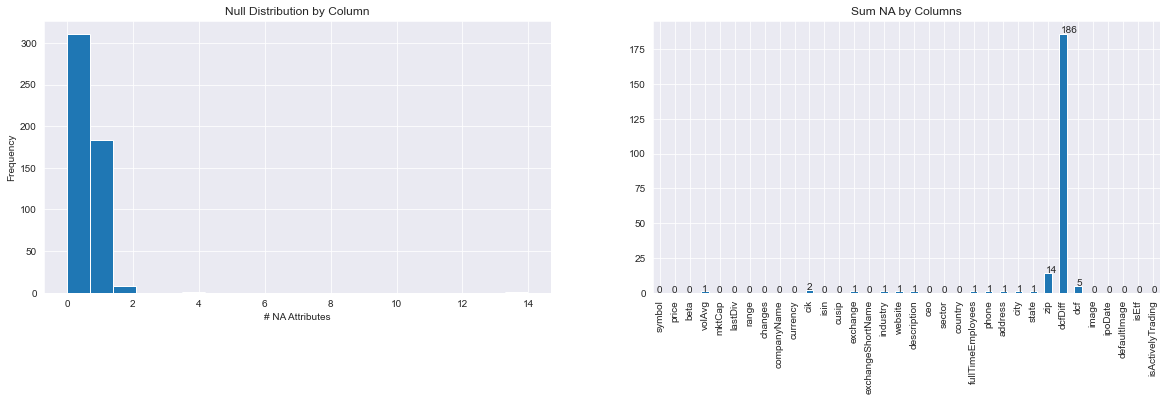

In [7]:
#check Missing Data for profiles
fig,axes = plt.subplots(1,2,figsize=(20,5))
print('Total Null For Stocks Profiles:',profiles[stocks].isnull().sum().sum())
ax1 = profiles[stocks].isnull().sum(axis=1).plot(kind='hist',bins = 20,ax=axes[0])
ax1.set_title('Null Distribution by Column')
ax1.set_xlabel('# NA Attributes')
ax2 = profiles[stocks].isnull().sum().plot(kind='bar',ax=axes[1])
for p in ax2.patches: #https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax2.set_title('Sum NA by Columns')
plt.show()

In [8]:
import warnings ##Not useful for this file's purposes, except to get in the way
warnings.filterwarnings("ignore")

In [9]:
#global constant example
ZIP_FILL = '000000'
zip_fill_index = profiles[stocks][profiles[stocks].zip.isnull()].index
profiles[stocks].loc[zip_fill_index,'zip'] = ZIP_FILL
##ignore pandas warning, only for example

In [10]:
#check missing data for prices 
prices = getTable('../../FinancesSp500.db','TS_PRICE_DAY')

In [11]:
prices.isnull().sum()

date                 0
open                 0
high                 0
low                  0
close                0
adjClose             0
volume              11
unadjustedVolume    11
change               0
changePercent        0
vwap                11
label                0
changeOverTime       0
symbol               0
dtype: int64

In [12]:
#take a look @ price columns with null values
prices[prices.isnull().any(1)]

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
4056124,2012-11-13,46.88,46.88,46.88,46.88,38.32,NaN,NaN,0.00,0.00,NaN,"November 13, 12",0.00,IEFA
4056135,2012-10-25,47.54,47.54,47.54,47.54,38.85,NaN,NaN,0.00,0.00,NaN,"October 25, 12",0.00,IEFA
4087050,2012-03-13,24.89,24.89,24.89,24.89,22.35,NaN,NaN,0.00,0.00,NaN,"March 13, 12",0.00,GOVT
4087051,2012-03-12,24.89,24.89,24.89,24.89,22.35,NaN,NaN,0.00,0.00,NaN,"March 12, 12",0.00,GOVT
4087055,2012-03-06,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 06, 12",0.00,GOVT
4087056,2012-03-05,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 05, 12",0.00,GOVT
4087057,2012-03-02,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 02, 12",0.00,GOVT
4087058,2012-03-01,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 01, 12",0.00,GOVT
4087059,2012-02-29,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"February 29, 12",0.00,GOVT
4087060,2012-02-28,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"February 28, 12",0.00,GOVT


In [13]:
#very crude imputation function from scratch
def fillTS(df,col):
    '''Impute time series data'''
    index = df[df[col].isnull()].index
    
    for i in index:
        
        ticker = df.loc[i,'symbol']
        date = df.loc[i,'date']
        
        prevDate = df[(df.date<date) & (df.symbol == ticker)].date.max()
        nextDate = df[(df.date>date) & (df.symbol == ticker)].date.min()
        while (True):
            if prevDate: #if prevdate for same symbol, set to that values
                newval = df[(df.date==prevDate)&(df.symbol==ticker)].loc[:,col].values[0]
                if ~np.isnan(newval):
                    df.loc[i,col] = newval
                    #print('Set on PREV')
                    break
            if nextDate: #else set to nextdates value for same symol
                newval = df[(df.date==nextDate)&(df.symbol==ticker)].loc[:,col].values[0]
                if ~np.isnan(newval):
                    df.loc[i,col] = newval
                    #print('Set on NEXT')
                    break
        
            print('SET TO 0')
            df.loc[i,col] = 0.0
            
    return df[col]    

In [14]:
prices2 = prices.copy()
prices2['volume'] = fillTS(prices2,'volume')
prices2.volume.isnull().sum()

0

quick notes – any iterative program like this would be a gigantic bottleneck, but this gets the idea accross

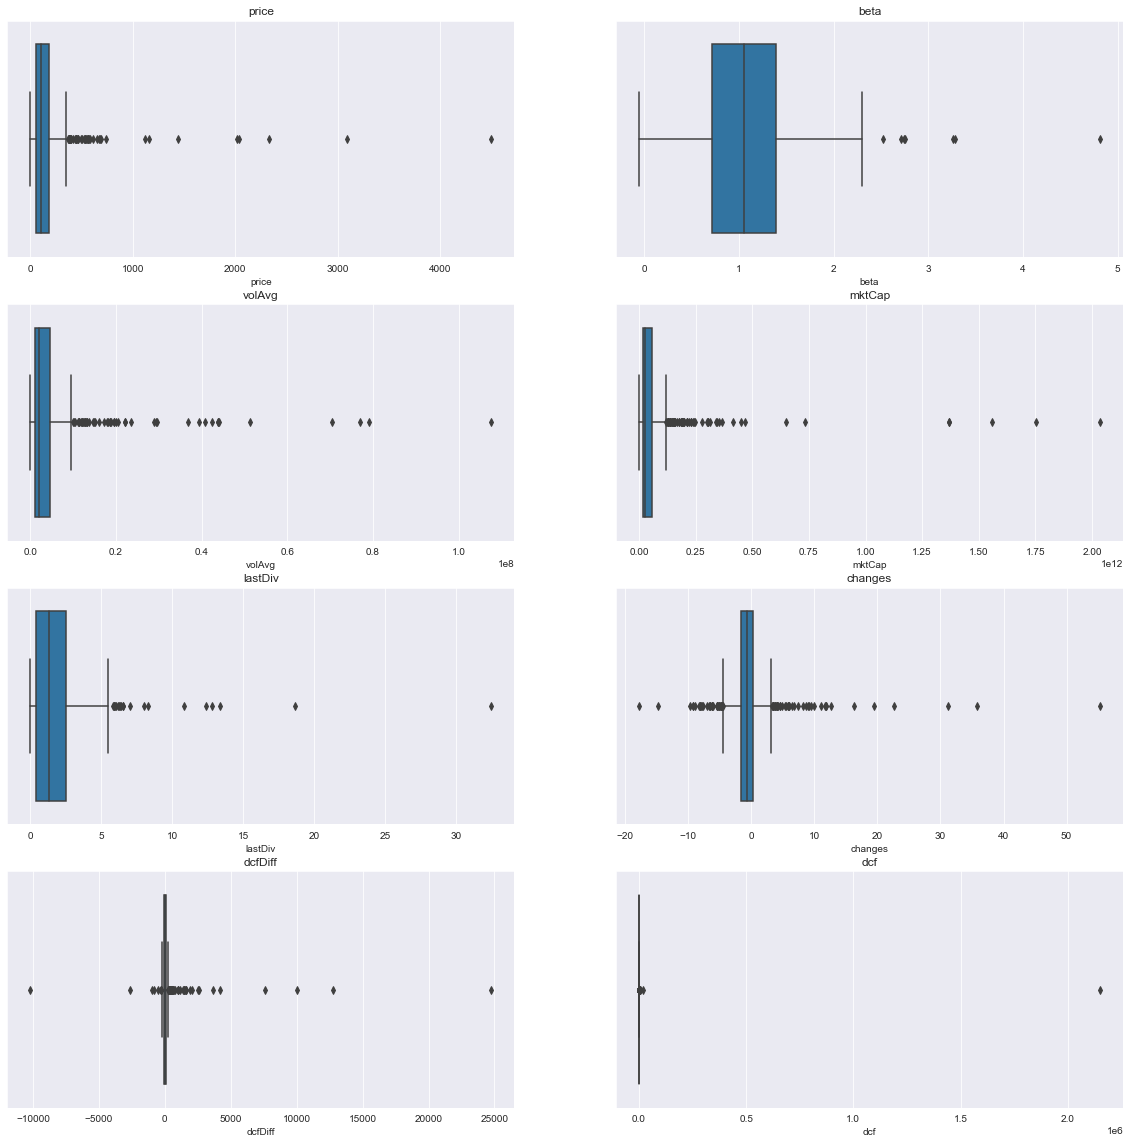

In [15]:
#Noisy data? quick check for outliers in continuous variables
stockdf = profiles[stocks] #..finally. 

#get continuous variable list
cont_columns = [col for col in stockdf.describe().columns if 'is' not in col.lower()]
cont_columns.remove('cik')
cont_columns.remove('defaultImage')

N_COLS = len(cont_columns)
COL_PROW = 2 #decide on number of columns per row– helps to find best view 
fig, axes = plt.subplots(int(np.ceil(N_COLS/COL_PROW)),COL_PROW,figsize = (20,20))

for i, contcol in enumerate(cont_columns):
    row = i // COL_PROW
    col = i % COL_PROW 
    #ax = sns.violinplot(stockdf[contcol],ax=axes[row,col],orient='h')
    ax = sns.boxplot(stockdf[contcol],ax=axes[row,col],orient='h')
    ax.set_title(contcol)
plt.show();

quick notes – dcf is really the only one where there seems to be a mistake/real outlier. The others can be handled with logging and other techniques

In [16]:
##Lets do a quick cleaning of this column (which would not make sense in real life)

#for missing data, lets assign class mean! this solut
dcf_null = stockdf[stockdf.dcf.isnull()].index
print(len(dcf_null),'NULL vals in dcf')
means = stockdf.groupby('sector')['dcf'].mean().to_dict()

5 NULL vals in dcf


In [17]:
stockdf.loc[dcf_null,'dcf'] = stockdf.loc[dcf_null].T.apply(lambda x: means.get(x.sector))

print(stockdf.dcf.isnull().sum(),'NULLS after apply')

0 NULLS after apply


quick notes– scratch solution a bit wonky due to the transposition of df in order to use apply correctly.. actually gave me some insight into writing lambdas

Before binning outlier


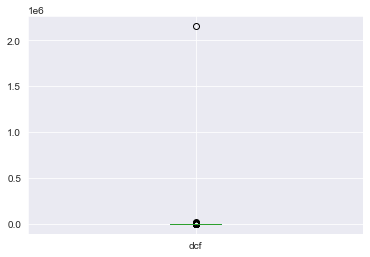

After binning outlier


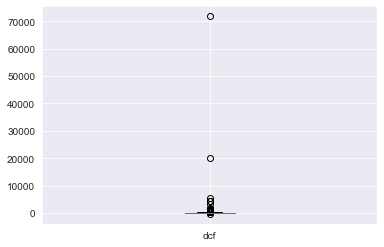

In [18]:
#okay, onto outlier
print('Before binning outlier')
stockdf['dcf'].plot(kind='box')
plt.show();
#assign noisy variable to class mean
outlier_index = stockdf[stockdf.dcf == stockdf.dcf.max()].index
stockdf.loc[outlier_index,'dcf'] = means.get(stockdf.loc[outlier_index,'sector'].values[0])
print('After binning outlier')
stockdf['dcf'].plot(kind='box')
plt.show();

quick notes– looks like there are still some outliers that may be enough dev to cause some issues, but the obvious mistake has been corrected. 
    This may benefit from further smoothing, discretization, etc.

In [19]:
#hit the dcf with some equi-depth partitioning
new_dcf = pd.qcut(stockdf.dcf,q=3)
stocks.dcf = new_dcf

In [20]:
stocks.dcf

1      (-288.71099999999996, 61.015]
2      (-288.71099999999996, 61.015]
3      (-288.71099999999996, 61.015]
4      (-288.71099999999996, 61.015]
6      (-288.71099999999996, 61.015]
                   ...              
611                (61.015, 143.538]
612             (143.538, 71836.941]
615    (-288.71099999999996, 61.015]
616    (-288.71099999999996, 61.015]
617    (-288.71099999999996, 61.015]
Name: dcf, Length: 504, dtype: category
Categories (3, interval[float64]): [(-288.71099999999996, 61.015] < (61.015, 143.538] < (143.538, 71836.941]]

<a id='L3'></a> 
## L3

In [21]:
#lets use brankruptcy data as example for cleaning, etc. 
brupt = getTable('../../FinancesSp500.db','BANKRUPTCY')

In [22]:
display(brupt.shape)
displayM([pd.DataFrame(brupt.isnull().sum()),pd.DataFrame(brupt.dtypes)],['Null Values','Data Types'])

(1209, 26)

Null Values,Data Types
,0
index,0
Debtor Name,0
Industry Division,0
Industry Group,0
Cause,0
Date Filed,0
Disposition,0
�363 Sale,0
Duration,44


quick notes -– for project, maybe write column-level df description tool like this w/ more attributes for quick look at df by column

In [23]:
#get data MINIMUM ready for review (which is on cleaning, etc. but cant do until base cleaning finished)

import datetime

brupt.fillna(value=np.nan,inplace=True)

brupt['Date Filed'] = pd.to_datetime(brupt['Date Filed']) #get usable datetime

brupt.rename(columns={'�363 Sale':'363sale'},inplace=True) #take out strange chars

brupt.Duration = brupt.Duration.apply(lambda x: x.replace(',','') if type(x) == str else x)
brupt.Duration = brupt.Duration.astype(float) #float to get around np.nan... note the potential use of nullable integer types in pandas. 

brupt.Employees = brupt.Employees.apply(lambda x: x.replace(',','') if type(x) == str else x)
brupt.Employees = brupt.Employees.astype(float) #float to get around np.nan

brupt['Date Disposed'] = pd.to_datetime(brupt['Date Disposed']) #get usable datetime.. note casting NAN works for date time w/out ternary apply fn

#leave asset and employee sizes for now, wont cause issues

brupt['Annual Sales'] = brupt['Annual Sales'].apply(lambda x: int(x[1:].replace(',','').strip()) if type(x) == str else x)
brupt['Assets (millions)'] = brupt['Assets (millions)'].apply(lambda x: int(x[1:].replace(',','').strip()) if type(x) == str else x)

#drop rows w/ ~50% + NA for ease of use
NA_THRESH = int(np.ceil(len(brupt.columns)/2))
brupt = brupt.dropna(axis=0,thresh=NA_THRESH)

#write semi-cleaned data to df for use in other files. (don't want to upload revised to db yet)
brupt.to_csv('bankruptcy.csv',index=False)

In [24]:
#regression imputation example for employees  

#get index


quick notes– binning (not regression) by Employee size would be the obvious solution here. these files are just for review!

In [25]:
'''
#first, drop rows w/ ~50% + NA for ease of use
NA_THRESH = int(np.ceil(len(brupt.columns)/2))
DATA = brupt.dropna(axis=0,thresh=NA_THRESH)
'''

DATA = brupt.copy()

#impute data needed for explanatory vars (annual sales) group by asset size
sales_null = DATA[DATA['Annual Sales'].isnull()].index
means = DATA.groupby(['Asset Size'])['Annual Sales'].mean().to_dict()
DATA.loc[sales_null,'Annual Sales'] = DATA.loc[sales_null].T.apply(lambda x: means.get(x['Asset Size']))

#def model
target = 'Employees'
model = ['Assets (millions)','Employee Size','Annual Sales']

#def data with/out missings for modeling v pred
t_index = DATA[DATA.Employees.notnull()].index
fill_index = DATA[DATA.Employees.isnull()].index

TARGET = DATA.loc[t_index,target] #target col
XFULL = DATA[model] #full x for later prediction
DATA = XFULL.loc[t_index] #data w/out nan for model

###Create dummies and drop for regression
DATA = pd.get_dummies(DATA,drop_first=True)

#run and display
ols = sm.OLS(TARGET,sm.add_constant(DATA))
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Ordinary least squares
=========================================================================================================
Model:                            OLS                          Adj. R-squared:                 0.746     
Dependent Variable:               Employees                    AIC:                            25149.7755
Date:                             2021-03-16 08:18             BIC:                            25185.4351
No. Observations:                 1205                         Log-Likelihood:                 -12568.   
Df Model:                         6                            F-statistic:                    591.9     
Df Residuals:                     1198                         Prob (F-statistic):             0.00      
R-squared:                        0.748                        Scale:                          6.7492e+07
---------------------------------------------------------------------------------------------------------
                                               Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------------------------------
const                                        49602.5016 1162.9675  42.6517 0.0000  47320.8220  51884.1811
Assets (millions)                               -0.0516    0.0094  -5.4650 0.0000     -0.0701     -0.0331
Annual Sales                                     0.0000    0.0000  23.2949 0.0000      0.0000      0.0000
Employee Size_b 10,000 but less than 30,000 -36492.5574 1295.6899 -28.1646 0.0000 -39034.6313 -33950.4836
Employee Size_c 1,000 but less than 10,000  -46726.4431 1191.3925 -39.2200 0.0000 -49063.8909 -44388.9952
Employee Size_d 200 but less than 1,000     -49294.4409 1275.1529 -38.6577 0.0000 -51796.2222 -46792.6595
Employee Size_e Less than 200               -49584.6178 1415.3108 -35.0344 0.0000 -52361.3813 -46807.8544
---------------------------------------------------------------------------------------------------------
Omnibus:                         1620.801                  Durbin-Watson:                     1.978      
Prob(Omnibus):                   0.000                     Jarque-Bera (JB):                  1450421.587
Skew:                            6.651                     Prob(JB):                          0.000      
Kurtosis:                        172.444                   Condition No.:                     94655040048
=========================================================================================================
* The condition number is large (9e+10). This might indicate             strong multicollinearity or
other numerical problems.
"""

In [26]:
#get predictions
pred = result.predict(pd.get_dummies(XFULL,drop_first=True))
imputed_vals = pred.loc[fill_index]

#######assign to column########
brupt.loc[fill_index,'Employees'] = imputed_vals

#verify
brupt.Employees.isnull().sum()

0

In [27]:
#very small-scale data integraton example
#in this case, lets do some crude schema/table integration w/ bankruptcy data and symbols (which I want to later do for actual project)

In [28]:
symbols = getTable('../../FinancesSp500.db','G1_CV_SYMBOLS')

In [29]:
#write new bankruptcy table to db
conn = sqlite3.connect('../../FinancesSp500.db')
c = conn.cursor()
c.execute('drop table if exists BANKRUPTCY_UPDATED')
brupt.to_sql(name='BANKRUPTCY_UPDATED',con=conn)

In [30]:
#integrate the tables with pandas 
brupt_x_symbols = pd.merge(brupt,symbols,left_on='Debtor Name',right_on='name',how='inner')
print(brupt_x_symbols.shape)
brupt_x_symbols.head(1)

(46, 30)


,index,Debtor Name,Industry Division,Industry Group,Cause,Date Filed,Disposition,363sale,Duration,Inc. State,District Filed,City Filed,Forum Shopping,Filing Party,Plan Type,Employees,Business Survival,Refiled,Headquarters City,Date Disposed,Asset Size,Employee Size,Annual Sales,Assets (millions),Chapter at Filing,Debtor's Attorney,symbol,name,price,exchange
0,11,Aceto Corporation,F: Wholesale Trade,51 Wholesale Trade-non-durable Goods,Not tort,2019-02-19,confirmed,363 sale,211.00,NY,NJ,Newark,Forum Shop,debtors,free fall,315.00,company did not emerge,not emerged 5 years,NY Central Islip,2019-09-18,c $500 million but less than $1billion,"d 200 but less than 1,000",733022614.00,518.00,Chapter 11,Lowenstein Sandler,ACET,Aceto Corporation,15.31,Nasdaq Global Select


quick notes– don't need index, this is very elementary (but worked), there is no real string comparison here other than ==... now for sql example

In [31]:
#sql integration example
brupt_x_sym_sql = pd.read_sql(
'''
select S.*, B.*
from G1_CV_SYMBOLS S
JOIN BANKRUPTCY B
    ON S.name like '%' || B."Debtor Name" || '%';
''',con=conn)
print(brupt_x_sym_sql.shape)

#drop redundant attribute
brupt_x_sym_sql.drop(columns=['name'])

#drop any duplicates
brupt_x_sym_sql.drop_duplicates(inplace=True)
brupt_x_sym_sql.head(1)

(74, 30)


,symbol,name,price,exchange,index,Debtor Name,Industry Division,Industry Group,Cause,Date Filed,Disposition,�363 Sale,Duration,Inc. State,District Filed,City Filed,Forum Shopping,Filing Party,Plan Type,Employees,Business Survival,Refiled,Headquarters City,Date Disposed,Asset Size,Employee Size,Annual Sales,Assets (millions),Chapter at Filing,Debtor's Attorney
0,HK,Halcon Resources Corporation,0.19,New York Stock Exchange,505,Halcon Resources Corporation,B: Mining,13 Oil And Gas Extraction,Not tort,7/27/16,confirmed,no 363 sale,43,DE,DE,Wilmington,Forum Shop,debtors,prepackaged,323,Company emerged,not emerged 5 years,TX Houston,9/8/16,b $1 billion but less than $10 billion,"d 200 but less than 1,000","$595,662,648","$3,744",Chapter 11,Weil Gotshal


quick notes – we see here that joining with a regex string comparison adds 60% additional data objects.. I know from manual inspection that this number should still be much higher (will write legit program for project), but this will do for the example. 

In [32]:
#normalization - lets do assets for bruptcy data
import sklearn.preprocessing as pp

#min-max
minmax = pp.MinMaxScaler()
brupt['Assets_minmax'] = minmax.fit_transform(X=brupt['Assets (millions)'].values.reshape(-1,1))
minmax = brupt[['Assets (millions)','Assets_minmax']]

#z-score
sscaler = pp.StandardScaler()
brupt['Assets_zScaled'] = sscaler.fit_transform(X=brupt['Assets (millions)'].values.reshape(-1,1))
z_scaled = brupt[['Assets (millions)','Assets_zScaled']]

displayM([minmax.head(6),z_scaled.head(6)])

,Assets (millions),Assets_minmax
0,845.00,0.00
1,1201.00,0.00
2,1563.00,0.00
3,350.00,0.00
4,705.00,0.00
5,457.00,0.00
,Assets (millions),Assets_zScaled
0,845.00,-0.13
1,1201.00,-0.11
2,1563.00,-0.10


quick notes –– minmax obviously bad for the very skewed data here, z-score better

In [33]:
#discretization examples
profiles['price_3qcut'] = pd.qcut(profiles.price,q=5)
profiles[['price','price_3qcut']].head()

,price,price_3qcut
0,380.01,"(190.0, 4500.84]"
1,52.72,"(36.638, 65.752]"
2,14.71,"(-0.001, 36.638]"
3,60.78,"(36.638, 65.752]"
4,91.53,"(65.752, 113.29]"


In [34]:
#further grouping nominal attributes
cats = list(profiles.exchange.value_counts().index)
cats.remove('New York Stock Exchange')
profiles['exchange_binary'] = profiles['exchange'].replace(to_replace=cats,value='Other')
profiles[['exchange','exchange_binary']].head(10)

,exchange,exchange_binary
0,NYSE Arca,Other
1,Nasdaq Global Select,Other
2,New York Stock Exchange,New York Stock Exchange
3,Nasdaq Global Select,Other
4,Nasdaq Global Select,Other
5,NYSE Arca,Other
6,New York Stock Exchange,New York Stock Exchange
7,New York Stock Exchange,New York Stock Exchange
8,NYSE Arca,Other
9,Nasdaq Global Select,Other


In [35]:
#concept hierarchy and aggregation opportunity example
displayM([profiles[['city','state','country']].head(),profiles.groupby('state').describe()['price'].head()],['Concept Hierarchy','Price Agg. By State'])

Concept Hierarchy Price Agg. By State 
 
 
 
 city 
 state 
 country 
 
 
 
 
 0 
 None 
 None 
 US 
 
 
 1 
 Philadelphia 
 PENNSYLVANIA 
 US 
 
 
 2 
 Houston 
 TEXAS 
 US 
 
 
 3 
 Santa Clara 
 CALIFORNIA 
 US 
 
 
 4 
 Boise 
 IDAHO 
 US 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 state 
 
 
 
 
 
 
 
 
 
 
 
 
 
 56.00 
 75.21 
 67.74 
 4.74 
 25.55 
 54.83 
 90.89 
 314.14 
 
 
 ALABAMA 
 2.00 
 94.00 
 103.77 
 20.62 
 57.31 
 94.00 
 130.68 
 167.37 
 
 
 ARIZONA 
 5.00 
 72.99 
 52.43 
 19.51 
 33.91 
 69.93 
 88.96 
 152.63 
 
 
 ARKANSAS 
 3.00 
 114.76 
 41.76 
 67.55 
 98.71 
 129.86 
 138.37 
 146.87 
 
 
 BRISTOL 
 1.00 
 10.92 
 NaN 
 10.92 
 10.92 
 10.92 
 10.92 
 10.92

In [36]:
##### DATA REDUCTION#####

###Numerosity reduction

#sampling
#randomly sample 50% of data
sample = np.random.choice(profiles.index,size=int(np.ceil(len(profiles)/2)))
profiles_50psample = profiles.loc[sample]
print(profiles.shape,profiles_50psample.shape)

(620, 36) (310, 36)


quick notes – obviously sophisticated libraries, methods(bootstrapping, stratified sampling, cv, etc) to use for real appl.

In [37]:
#data aggregation 
stock_prof = profiles[(profiles.exchangeShortName != 'MUTUAL_FUND') & (profiles.isEtf == False)]
displayM([stock_prof[['symbol','sector','price']].head(12),stock_prof.groupby('sector').describe()['price']],['Original','Price Agg. by Sector'])

Original Price Agg. by Sector 
 
 
 
 symbol 
 sector 
 price 
 
 
 
 
 1 
 CMCSA 
 Communication Services 
 52.72 
 
 
 2 
 KMI 
 Energy 
 14.71 
 
 
 3 
 INTC 
 Technology 
 60.78 
 
 
 4 
 MU 
 Technology 
 91.53 
 
 
 6 
 GE 
 Industrials 
 12.56 
 
 
 7 
 BAC 
 Financial Services 
 34.75 
 
 
 9 
 AAPL 
 Technology 
 121.26 
 
 
 10 
 MSFT 
 Technology 
 232.38 
 
 
 11 
 HPQ 
 Technology 
 28.97 
 
 
 14 
 F 
 Consumer Cyclical 
 11.70 
 
 
 15 
 AMD 
 Technology 
 84.51 
 
 
 16 
 FB 
 Communication Services 
 257.62 
 
 
 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 sector 
 
 
 
 
 
 
 
 
 
 
 
 
 Basic Materials 
 22.00 
 145.08 
 145.66 
 19.73 
 55.53 
 106.18 
 164.86 
 680.68 
 
 
 Communication Services 
 25.00 
 268.68 
 550.75 
 12.29 
 31.93 
 64.49 
 133.97 
 2036.86 
 
 
 Consumer Cyclical 
 65.00 
 305.03 
 732.08 
 10.92 
 45.11 
 103.53 
 161.00 
 4500.84 
 
 
 Consumer Defensive 
 34.00 
 101.92 
 72.37 
 23.17 
 50.02 
 79.64 
 128.97 
 331.00 
 
 
 Energy 
 22.00 
 47.96 
 33.81 
 11.12 
 22.05 
 41.02 
 65.31 
 148.57 
 
 
 Financial Services 
 67.00 
 132.53 
 131.51 
 15.34 
 48.92 
 93.95 
 162.32 
 695.12 
 
 
 Healthcare 
 64.00 
 217.40 
 192.95 
 14.85 
 78.39 
 166.29 
 275.57 
 1118.88 
 
 
 Industrials 
 75.00 
 147.22 
 105.91 
 0.00 
 64.34 
 117.80 
 202.59 
 577.73 
 
 
 Real Estate 
 30.00 
 120.32 
 121.89 
 16.59 
 45.39 
 87.42 
 150.58 
 648.34 
 
 
 Technology 
 72.00 
 183.03 
 140.80 
 14.56 
 81.92 
 141.31 
 235.59 
 567.19 
 
 
 Utilities 
 28.00 
 64.05 
 29.58 
 19.39 
 44.27 
 62.12 
 79.65 
 141.63

## L4 <a id='L4' ></a>

#### Dimensionality Reduction

In [38]:
brupt_x_sym_sql.shape  #see what we can do w/ high d/n ratio

(74, 30)

In [39]:
##wavelet tranformation 
from scipy.signal import cwt
import pywt

In [40]:
#get simple timeseries to model 
coke = prices[(prices.symbol=='KO') & (prices.date >= '1990-01-01')]
coke.drop(columns='label',inplace=True)

In [41]:
n_samples = coke.shape[0] 
n_signals = coke.shape[1] 

####COME BACK TO THIS–––– GOOD SUBJECT FOR WEEKEND HACKATHONS!#####

In [42]:
###Principal Component Analysis (PCA)

###create highly dimensional dataset and log a couple attributes
brupt_pca_data = brupt.drop(columns=['index',
                                     'Debtor Name',
                                     'Date Filed',
                                     'District Filed',
                                     'City Filed',
                                     'Filing Party',
                                     'Refiled',
                                     'Headquarters City',
                                     'Date Disposed',
                                     'Employee Size',
                                     'Assets (millions)',
                                     "Debtor's Attorney",
                                     'Assets_minmax',
                                    'Assets_zScaled'])
brupt_pca_data = pd.get_dummies(brupt_pca_data,drop_first=True)
brupt_pca_data['Employees'] = np.log2(brupt_pca_data['Employees'])
brupt_pca_data['Annual Sales'] = np.log2(brupt_pca_data['Annual Sales'])

In [43]:
#standardize/normalize data
np.set_printoptions(suppress=True)
from sklearn.preprocessing import StandardScaler as SS
scaler = SS()
scaler.fit(brupt_pca_data)
scaler.transform(brupt_pca_data)

array([[        nan, -1.57400245, -1.70289672, ..., -0.54546268,
         6.87895341, -0.04989616],
       [-0.50427099,  0.31835437,  0.30267038, ..., -0.54546268,
        -0.14537095, -0.04989616],
       [ 1.15446105,  0.56252929,  0.50052495, ..., -0.54546268,
        -0.14537095, -0.04989616],
       ...,
       [ 0.03808293,  0.97678164,  0.85202289, ..., -0.54546268,
        -0.14537095, -0.04989616],
       [-0.81503582,  0.63475867,  0.5056054 , ..., -0.54546268,
        -0.14537095, -0.04989616],
       [-0.755654  , -0.90717253, -0.85112081, ...,  1.83330598,
        -0.14537095, -0.04989616]])

In [44]:
#compute covariance matrix
covar = brupt_pca_data.cov()
eigval, eigvect = np.linalg.eig(covar)

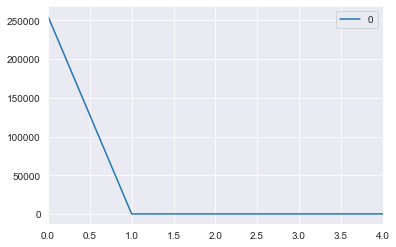

In [45]:
pd.DataFrame(eigval).plot(xlim=[0,4]);

In [46]:
eigval[:10]

array([255451.93665114+0.j,      9.09403108+0.j,      1.37875799+0.j,
            0.35249664+0.j,      0.3340003 +0.j,      0.26856692+0.j,
            0.2534998 +0.j,      0.24634757+0.j,      0.1972162 +0.j,
            0.18869885+0.j])

quick notes – if I had to choose to do PCA on this data, I would probably only choose the first/first three eigenvectors for my model

    --- The drastic nature of this obviously suggests something is wrong, but this works as an example!!        
    
    ---who knows, maybe I discovered some kind of world-changing latent finance trend using PCA on 1000 rows of categorical bankruptcy data

In [47]:
#for sequential feature selction techniues, see stats review 

In [48]:
### subset selction using decision tree induction
stockdf.describe().columns

Index(['price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'changes', 'cik',
       'dcfDiff', 'dcf', 'defaultImage', 'isEtf', 'isActivelyTrading'],
      dtype='object')

#### Attempt rpy2

In [49]:
%load_ext rpy2.ipython

In [50]:
%R require(ggplot2)

R[write to console]: Loading required package: ggplot2



1


In [51]:
#define structures
#stockdf_notnull = stockdf[stockdf.notnull()].loc[:,['price','beta','isEtf','volAvg','exchangeShortName','lastDiv','changes','sector']]
prof_notnull = profiles[profiles.notnull()].loc[:,['price','beta','isEtf','volAvg','exchangeShortName','lastDiv','changes','sector']]

#transform, etc. for R input

#stock
stockdf['price_log2'] = np.log2(stockdf['price'])
stockdf['changes_log2'] = np.log2(stockdf['changes'])
print(stockdf.columns)

#all
prof_notnull = prof_notnull[prof_notnull.exchangeShortName != 'MUTUAL_FUND']
prof_notnull.isEtf = prof_notnull.isEtf.astype(bool)
prof_notnull['price_log2'] = np.log2(prof_notnull['price'])
prof_notnull['changes_log2'] = np.log2(prof_notnull['changes'])

Index(['symbol', 'price', 'beta', 'volAvg', 'mktCap', 'lastDiv', 'range',
       'changes', 'companyName', 'currency', 'cik', 'isin', 'cusip',
       'exchange', 'exchangeShortName', 'industry', 'website', 'description',
       'ceo', 'sector', 'country', 'fullTimeEmployees', 'phone', 'address',
       'city', 'state', 'zip', 'dcfDiff', 'dcf', 'image', 'ipoDate',
       'defaultImage', 'isEtf', 'isActivelyTrading', 'price_log2',
       'changes_log2'],
      dtype='object')


R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



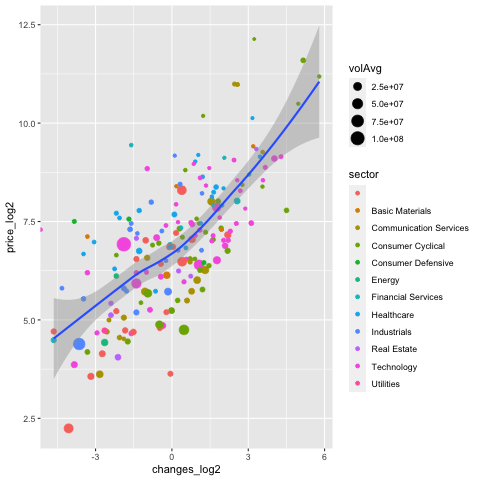

In [52]:
%%R -i prof_notnull

#ggplot(data = stockdf_notnull) + geom_point(aes(x = beta, y = price, color = sector,size=volAvg)) 

ggplot(data = prof_notnull) + geom_point(aes(x = changes_log2, y = price_log2, color = sector, size=volAvg)) + geom_smooth(aes(x = changes_log2, y=price_log2))

quick notes – this is pretty cool, and much more intuitive to use than I expected... will have to use some R-packages for special models (and more ggplot, which is noticably better than mpl)

## L 5/6

quick notes – didn't code anything from section on data warehouse. Can potentially implement on AWS

In [341]:
from sklearn import tree, preprocessing

In [342]:
#drop unneeded cols
brupt_tree_data = brupt.drop(labels = ['index','Debtor Name','Date Filed','Inc. State','District Filed','City Filed','Headquarters City','Date Disposed',"Debtor's Attorney", 'Assets_minmax','Assets_zScaled','Industry Group','Refiled',
                                      'Disposition'],axis=1)
#drop duplicate columns
brupt_tree_data.drop(labels=['Employee Size','Asset Size'],axis=1,inplace=True)

#clean up target var, make binary
brupt_tree_data['Business Survival'].replace(['case pending','not classified', 'no data'],'other',inplace=True)
brupt_tree_data.drop(index=brupt_tree_data[brupt_tree_data['Business Survival']=='other'].index,inplace=True)

#clean up other vars before encoding, drop random cols (unrealistic but I am trying to work quickly to show concept of dt only )
brupt_tree_data['Cause'].replace(['Fraud','Asbestos','Pension','Fraud','Other tort','Other products','Environmental','Patent'],'Tort',inplace=True)
bript_tree_data = brupt_tree_data[brupt_tree_data['Filing Party']!= 'debtors and creditors']
bript_tree_data = brupt_tree_data[brupt_tree_data['Plan Type']!= 'not applicable']

#Encode

cat_columns = [
    'Industry Division', 'Cause', '363sale', 'Forum Shopping','Filing Party','Plan Type','Chapter at Filing'
]

for col in cat_columns:
    
    brupt_tree_data[col] = brupt_tree_data[col].astype(dtype='category')
    #label encoder
    #brupt_tree_data[col] = brupt_tree_data[col].cat.codes



targ = 'Business Survival'
DATA = brupt_tree_data.dropna()
TARGET = DATA[targ]
DATA.drop(columns=[targ],inplace=True)

#onehot encoder – not ideal for decision trees, but quickly works 
DATA = pd.get_dummies(DATA) ##Keep first col, unlike reg!

In [343]:
brupt_tree_data['Chapter at Filing'].value_counts()

Chapter 11    1145
Chapter 7       24
Name: Chapter at Filing, dtype: int64

In [344]:
dct1 = tree.DecisionTreeClassifier(max_depth=2,criterion='gini',min_impurity_split=.1) #specify split criterion, stopping criterion, max_depth
dct1.fit(DATA,TARGET)

DecisionTreeClassifier(max_depth=2, min_impurity_split=0.1)

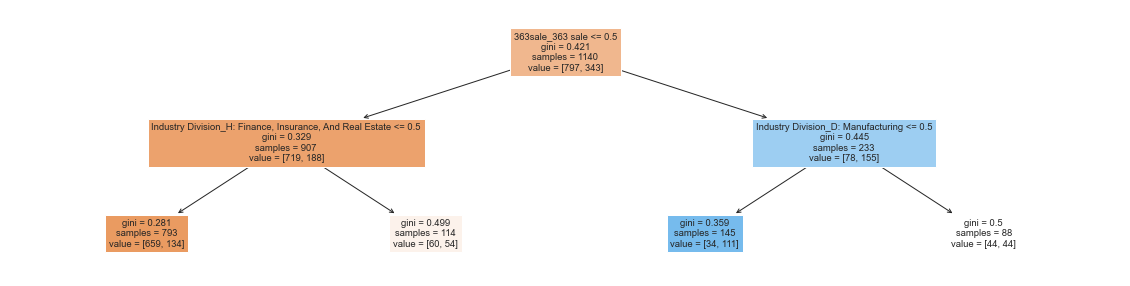

In [345]:
fig = plt.figure(figsize=(20,5))
tree.plot_tree(dct1,filled=True,feature_names=DATA.columns);

#### quick notes  

    ---it seems strangely difficult to get sklearn's regular decision tree classifier to use categorical data correctly, even with multiple types of encoding tried?  
    --- sklearn just refuses to acknowledge these vars as categorical the way a typical decision tree would. Looking online it seems this is a common issue!
    
    ---I would not use a decision tree for this type of problem to begin with, but again, here is just a bit of an example
    ---Obviously would use CV, eval measures to check tree
    
    ---Now lets check out a decision tree with realsistic parameters, and check some visualizaions

In [358]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = tts(DATA, TARGET)

max_depth = 50
    
metrics = pd.DataFrame(columns=['n','accuracy_depth','accuracy_nodes'])
for i in range(2,max_depth+1):
    #lets make one more tree w/ more realistic parameters & test 
    depthtree = tree.DecisionTreeClassifier(max_depth=i)
    nodetree = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    
    depthtree.fit(X_train,y_train)
    nodetree.fit(X_train,y_train)
    
    depth_pred = depthtree.predict(X_test)
    node_pred = nodetree.predict(X_test)
    
    acc_depth = accuracy_score(y_test,depth_pred)
    acc_node = accuracy_score(y_test,node_pred)
    
    metrics = metrics.append({'n':i,'accuracy_depth':acc_depth,'accuracy_nodes':acc_node},ignore_index=True)

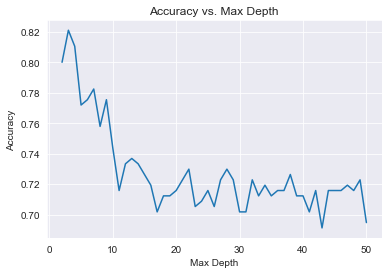

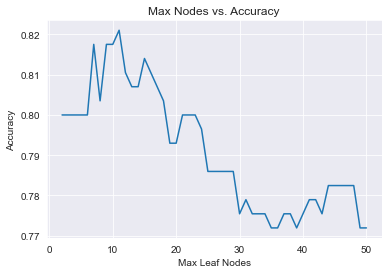

In [359]:
plt.plot('n','accuracy_depth',data=metrics)
plt.title('Accuracy vs. Max Depth')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.show()

plt.plot('n','accuracy_nodes',data=metrics)
plt.title('Max Nodes vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.show()

#### quick notes   

    ---It is obvious that overfitting sets in quickly in regards to these two featured parameters
    ---Considering simplicity of model selection, accuracy of ~.8 for the two best parameters is actually not bad!
    ---Obviously performing a gridsearch on this tree would be better than iterating through single parameter at a time, but works well to demonstrate overfitting
    ---below is one final model w/ best params from above

Final Accuracy (No CV, primitive multiple univariate gridsearch): 0.8210526315789474




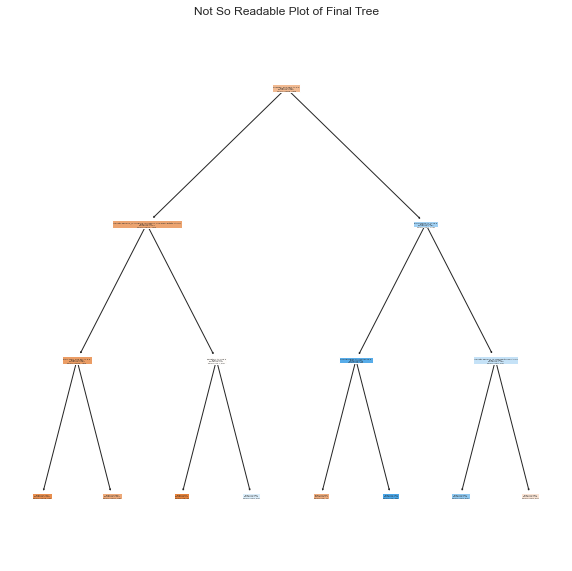

FEATURE IMPORTANCE RANKED

1 – 363sale_363 sale: [0.59379916]
2 – Industry Division_H: Finance, Insurance, And Real Estate: [0.15089585]
3 – Plan Type_free fall: [0.06537803]
4 – Employees: [0.0598194]
5 – Industry Division_D: Manufacturing: [0.04718262]
6 – Duration: [0.04666947]
7 – Annual Sales: [0.03625546]


In [419]:
#Create final model w/ best of both parameters

#lets make one more tree w/ more realistic parameters & test 

#optimal depth
o_depth = int(metrics[metrics['accuracy_depth']==metrics['accuracy_depth'].max()].loc[:,'n'].min())#note using min to keep the model as simple as possible if similar accuracy for more and less complex models!!!
#optimal leaf nodes
o_nodes = int(metrics[metrics['accuracy_nodes']==metrics['accuracy_nodes'].max()].loc[:,'n'].min())

finaltree = tree.DecisionTreeClassifier(max_depth=o_depth,max_leaf_nodes=o_nodes)

finaltree.fit(X_train,y_train)

final_pred = finaltree.predict(X_test)

acc_final = accuracy_score(y_test,final_pred)

print('Final Accuracy (No CV, primitive multiple univariate gridsearch): {}\n\n'.format(acc_final))

#terrible plot of 'optimal' tree... 
fig = plt.figure(figsize=(10,10))
tree.plot_tree(finaltree,filled=True,feature_names=DATA.columns);
plt.title('Not So Readable Plot of Final Tree')
plt.show();

#rank features by importance and show

ranked_features = pd.DataFrame(finaltree.feature_importances_).sort_values(by=0,ascending=False)
ranked_features_index = ranked_features[ranked_features[0]!=0].index
print('FEATURE IMPORTANCE RANKED\n')
for n, i in enumerate(ranked_features_index,start=1):
    feature = DATA.columns.values[i]
    score = ranked_features.loc[i].values
    print('{} – {}: {}'.format(n,feature,score))

#### quick notes   

    ---again, not bad for primitive model selection, preprocessing, feature selection, etc... Would obviously like to CV and be more thorough w/ whole process. BUT, this is good example

## L7